In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
file_path = '911_Calls_for_Service.csv'
data = pd.read_csv(file_path, delimiter='\t')

In [37]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   recordId                     1048575 non-null  int64  
 1   callKey                      1048575 non-null  object 
 2   callDateTime                 1048575 non-null  object 
 3   priority                     1048574 non-null  object 
 4   district                     1048575 non-null  object 
 5   description                  1048575 non-null  object 
 6   callNumber                   1048575 non-null  object 
 7   incidentLocation             1048575 non-null  object 
 8   location                     1048575 non-null  object 
 9   Neighborhood                 1047449 non-null  object 
 10  PoliceDistrict               1047557 non-null  object 
 11  PolicePost                   1047557 non-null  float64
 12  CouncilDistrict              1047605 non-n

In [61]:
data.describe()

,recordId,callDateTime,NeedsSync,ESRI_OID,month,hour
count,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242880e+05,2022-01-21 19:46:37.655676160,9.988356e-01,4.686885e+05,6.418340e+00,1.246466e+01
min,1.000000e+00,2021-01-01 05:00:00,0.000000e+00,2.700000e+01,1.000000e+00,0.000000e+00
25%,2.621445e+05,2021-07-15 13:58:30,1.000000e+00,2.041705e+05,4.000000e+00,5.000000e+00
50%,5.242880e+05,2022-01-25 22:22:00,1.000000e+00,4.663150e+05,6.000000e+00,1.400000e+01
75%,7.864315e+05,2022-07-21 21:05:00,1.000000e+00,7.284585e+05,9.000000e+00,1.900000e+01
max,1.048575e+06,2023-02-02 05:30:00,1.000000e+00,9.906020e+05,1.200000e+01,2.300000e+01
std,3.026977e+05,NaN,3.410400e-02,2.989310e+05,3.412409e+00,7.535413e+00


In [38]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 recordId                             0
callKey                              0
callDateTime                         0
priority                             1
district                             0
description                          0
callNumber                           0
incidentLocation                     0
location                             0
Neighborhood                      1126
PoliceDistrict                    1018
PolicePost                        1018
CouncilDistrict                    970
SheriffDistricts                  1046
Community_Statistical_Areas       1647
Census_Tracts                     1086
ZIPCode                           1498
NeedsSync                            0
ESRI_OID                             0
Unnamed: 19                    1048575
dtype: int64


In [39]:

data['priority'] = data['priority'].fillna('Unknown')
data['Neighborhood'] = data['Neighborhood'].fillna('Unknown')
data['PoliceDistrict'] = data['PoliceDistrict'].fillna('Unknown')
data['PolicePost'] = data['PolicePost'].fillna('Unknown')
data['CouncilDistrict'] = data['CouncilDistrict'].fillna('Unknown')
data['SheriffDistricts'] = data['SheriffDistricts'].fillna('Unknown')
data['Community_Statistical_Areas'] = data['Community_Statistical_Areas'].fillna('Unknown')
data['Census_Tracts'] = data['Census_Tracts'].fillna('Unknown')
data['ZIPCode'] = data['ZIPCode'].fillna('Unknown')

In [40]:
data = data.drop(columns=['Unnamed: 19'], errors='ignore')

In [62]:
data.count()

recordId                       1048575
callKey                        1048575
callDateTime                   1048575
priority                       1048575
district                       1048575
description                    1048575
callNumber                     1048575
incidentLocation               1048575
location                       1048575
Neighborhood                   1048575
PoliceDistrict                 1048575
PolicePost                     1048575
CouncilDistrict                1048575
SheriffDistricts               1048575
Community_Statistical_Areas    1048575
Census_Tracts                  1048575
ZIPCode                        1048575
NeedsSync                      1048575
ESRI_OID                       1048575
month                          1048575
hour                           1048575
time_period                    1048575
dtype: int64

In [68]:
data.head()

,recordId,callKey,callDateTime,priority,district,description,callNumber,incidentLocation,location,Neighborhood,...,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,ZIPCode,NeedsSync,ESRI_OID,month,hour,time_period
0,1,10CC9DA95FF34377,2021-01-04 16:33:00,Low,TRU,HIT AND RUN,P210041843,3500 AILSA AV,3500 AILSA AV BALTIMORE MD,Waltherson,...,2.0,D4,Lauraville,Census Tract 2701.02,21214.0,0,79,1,16,PM
1,2,10CC9DA95FF3518A,2021-01-04 17:34:00,Medium,WD,NARCOTICS,P210042073,1700 N CALHOUN ST,1700 N CALHOUN ST BALTIMORE MD,Sandtown-Winchester,...,7.0,D9,Sandtown-Winchester/Harlem Park,Census Tract 1501,21217.0,0,80,1,17,PM
2,3,10CC9DA95FF35312,2021-01-04 17:40:00,Low,CD,OTHER,P210042088,2000 DRUID HILL AV,2000 DRUID HILL AV BALTIMORE MD,Druid Heights,...,11.0,D8,Upton/Druid Heights,Census Tract 1403,21217.0,0,81,1,17,PM
3,4,10CC9DA95FF3543D,2021-01-04 17:45:00,Medium,SD,NARCOTICS,P210042103,600 S PAYSON ST,600 S PAYSON ST BALTIMORE MD,Carrollton Ridge,...,9.0,D8,Southwest Baltimore,Census Tract 2003,21223.0,0,82,1,17,PM
4,5,10CC9DA95FF4659A,2021-01-05 13:11:00,Low,TRU,DESTRUCT PROP,P210051288,3600 CHESTERFIELD AV,3600 CHESTERFIELD AV BALTIMORE MD,Belair-Edison,...,13.0,D6,Belair-Edison,Census Tract 2603.02,21213.0,0,83,1,13,PM


: 

In [41]:
data['callDateTime'] = pd.to_datetime(data['callDateTime']).dt.tz_convert(None)
data['month'] = data['callDateTime'].dt.month
data['hour'] = data['callDateTime'].dt.hour

In [42]:
bins = [0, 12, 24]
labels = ['AM', 'PM']
data['time_period'] = pd.cut(data['hour'], bins=bins, labels= labels, right= False)

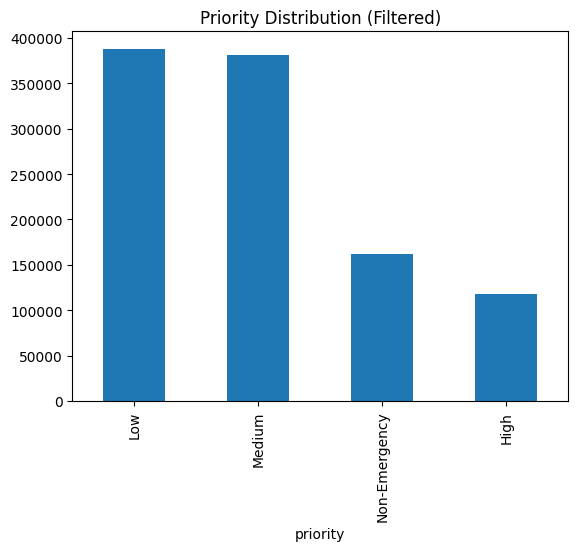

In [43]:
priority_filtered = data[~data['priority'].isin(['Out of Service', 'Emergency', 'Unknown'])]
priority_filtered['priority'].value_counts().plot(kind='bar', title='Priority Distribution (Filtered)')
plt.savefig('priority_distribution_filtered.png')
plt.show()

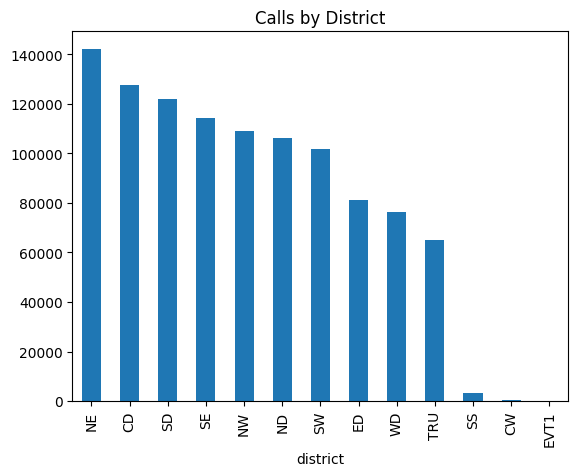

In [44]:
data['district'].value_counts().plot(kind='bar', title='Calls by District')
plt.savefig('calls_by_district.png')
plt.show()

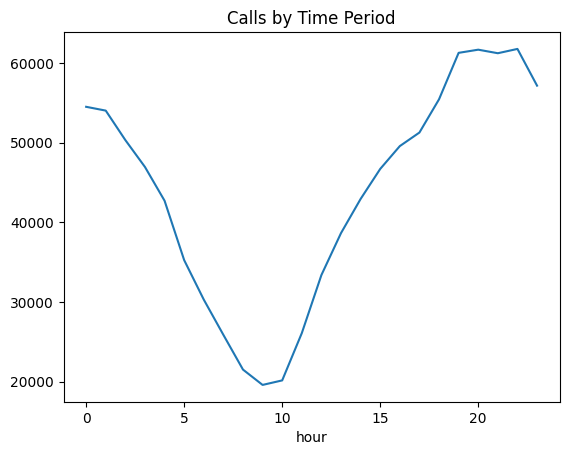

In [60]:
data['hour'].value_counts().sort_index().plot(kind='line', title='Calls by Time Period')
plt.savefig('calls_by_time_period.png')
plt.show()

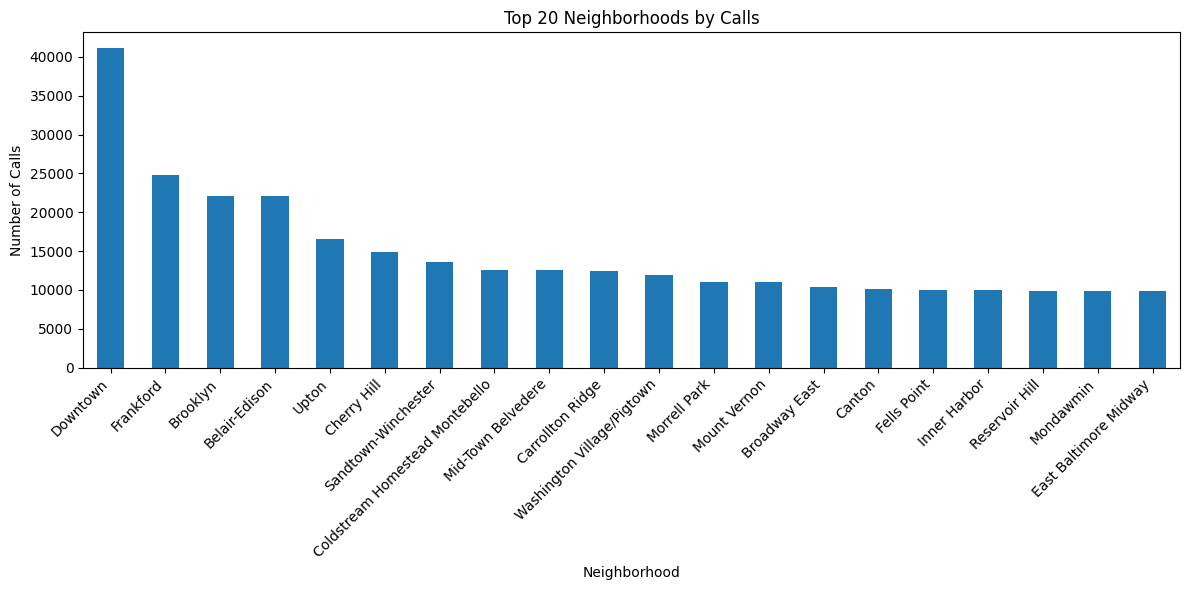

In [46]:
plt.figure(figsize=(12, 6))
data['Neighborhood'].value_counts().head(20).plot(kind='bar', title='Top 20 Neighborhoods by Calls')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_neighborhoods_by_calls.png')
plt.show()

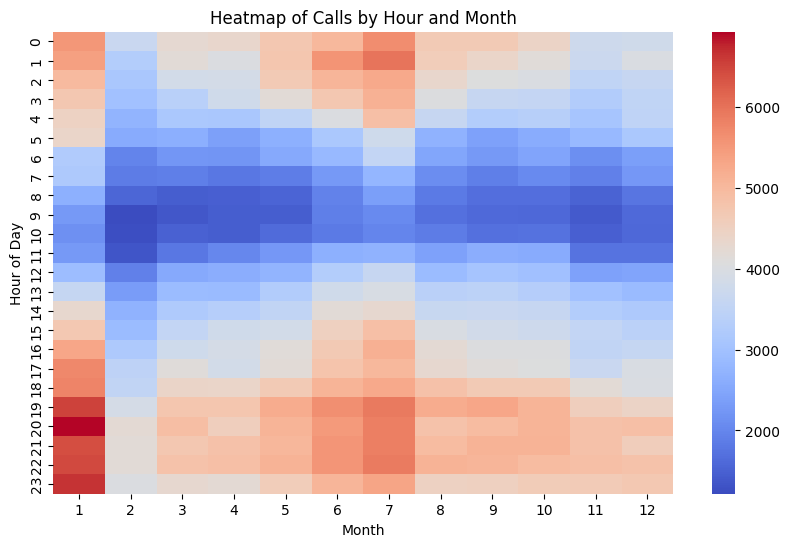

In [47]:
plt.figure(figsize=(10, 6))
pivot_table = data.pivot_table(index='hour', columns='month', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title('Heatmap of Calls by Hour and Month')
plt.xlabel('Month')
plt.ylabel('Hour of Day')
plt.savefig('heatmap_calls_by_hour_and_month.png')
plt.show()

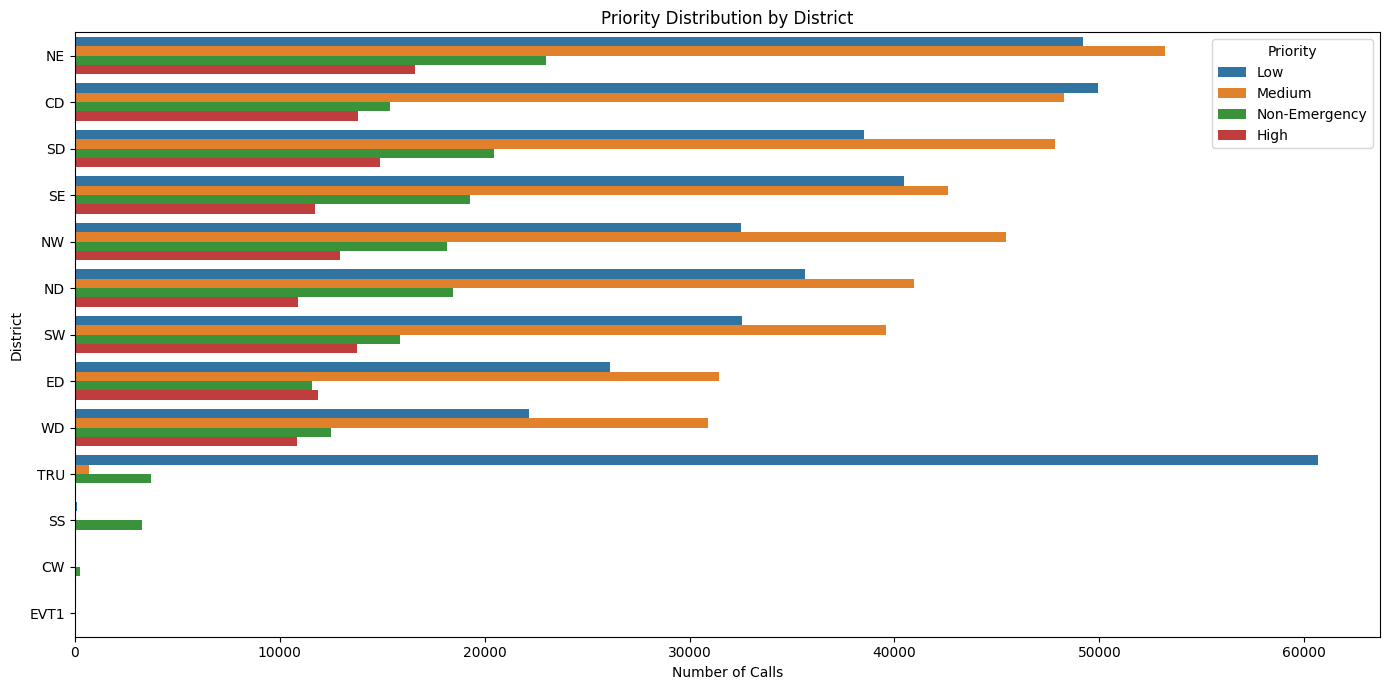

In [48]:
plt.figure(figsize=(14, 7))
sns.countplot(y='district', hue='priority', data=priority_filtered, order=priority_filtered['district'].value_counts().index)
plt.title('Priority Distribution by District')
plt.xlabel('Number of Calls')
plt.ylabel('District')
plt.legend(title='Priority')
plt.tight_layout()
plt.savefig('priority_distribution_by_district.png')
plt.show()

In [49]:
model_data = data[data['priority'] != 'Unknown']
X = model_data[['month', 'time_period','Neighborhood', 'district']]
X = pd.get_dummies(X, columns=['time_period','Neighborhood', 'district'], drop_first= True )
y = model_data['priority']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
y_pred = clf.predict(X_test)

In [53]:
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

C:\Users\nebil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nebil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nebil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Classification Report: 
                 precision    recall  f1-score   support

     Emergency       0.00      0.00      0.00        30
          High       0.21      0.00      0.01     23487
           Low       0.52      0.50      0.51     78005
        Medium       0.42      0.70      0.53     75827
 Non-Emergency       0.45      0.14      0.21     32312
Out of Service       0.00      0.00      0.00        54

      accuracy                           0.46    209715
     macro avg       0.27      0.22      0.21    209715
  weighted avg       0.44      0.46      0.41    209715

Confusion Matrix: 
 [[    0     0     6    23     1     0]
 [    0   106  6616 15940   825     0]
 [    1   170 38656 37248  1930     0]
 [    0   148 20429 52705  2545     0]
 [    1    89  8829 18995  4398     0]
 [    0     0    17    31     6     0]]


In [54]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 district_TRU                            0.350049
month                                   0.193157
district_SS                             0.039682
time_period_PM                          0.028315
district_NW                             0.011801
                                          ...   
Neighborhood_Morgan Park                0.000285
Neighborhood_Forest Park Golf Course    0.000280
Neighborhood_Dundalk Marine Terminal    0.000198
Neighborhood_Blythewood                 0.000164
district_EVT1                           0.000006
Length: 292, dtype: float64


In [55]:
high_priority_calls = model_data[model_data['priority'] == 'High']
top_neighborhoods = high_priority_calls['Neighborhood'].value_counts().head(5)
top_hours = high_priority_calls['time_period'].value_counts().head(5)

In [56]:
print("Top Neighborhoods for High-Priority Calls: \n", top_neighborhoods)
print("Top Hours for High-Priority Calls:\n", top_hours)

Top Neighborhoods for High-Priority Calls: 
 Neighborhood
Downtown         3671
Belair-Edison    2660
Brooklyn         2630
Frankford        2609
Upton            2240
Name: count, dtype: int64
Top Hours for High-Priority Calls:
 time_period
PM    64972
AM    52405
Name: count, dtype: int64


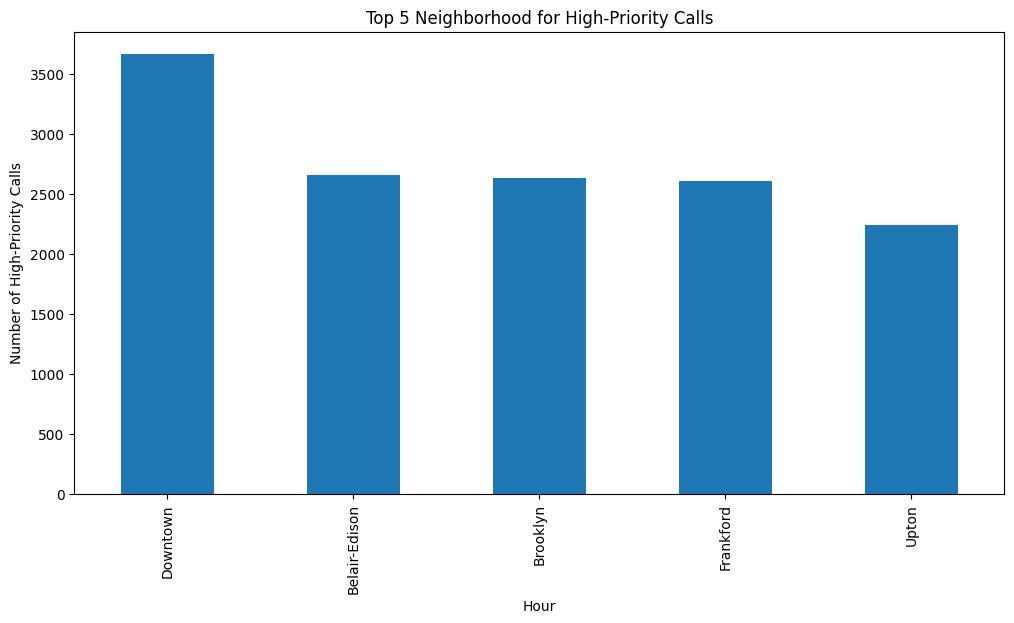

In [57]:
plt.figure(figsize=(12, 6))
top_neighborhoods.plot(kind='bar', title='Top 5 Neighborhood for High-Priority Calls')
plt.xlabel('Hour')
plt.ylabel('Number of High-Priority Calls')
plt.savefig('top_neighborhood_high_priority.png')
plt.show()

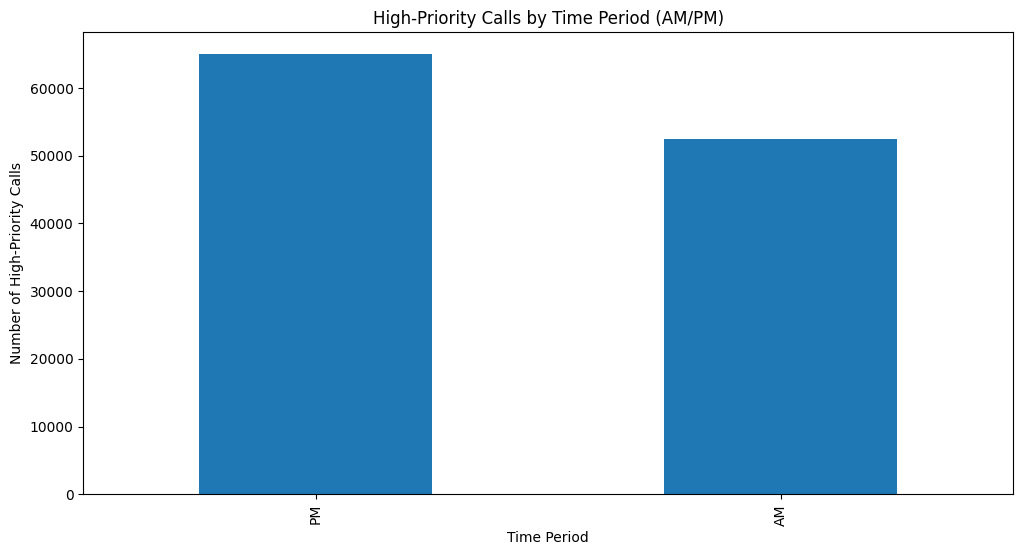

In [58]:
plt.figure(figsize=(12, 6))
top_hours.plot(kind='bar', title='High-Priority Calls by Time Period (AM/PM)')
plt.xlabel('Time Period')
plt.ylabel('Number of High-Priority Calls')
plt.savefig('top_hours_high_priority.png')
plt.show()

In [59]:
#for i, chunk in enumerate(range(0, len(data), 100000)):
 #   chunk_file = f'cleaned_911_calls_chunk_{i+1}.xlsx'
  #  data.iloc[chunk:chunk+100000].to_excel(chunk_file, index=False)
  #  print(f"Chunk {i+1} saved to {chunk_file}")
